In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ITERATIONS = 10
algos = ['RLS', '(1+1)-EA', '(1+2)-EA', '(1+10)-EA', '(1+20)-EA', '(1+50)-EA']
iter_cols = ['iteration-' + str(1 + i) for i in range(ITERATIONS)]

In [3]:
df = pd.read_csv('results-10.csv')
df['mean'] = df[iter_cols].sum(axis=1) / ITERATIONS
df

,algorithm,test-function,n,iteration-1,iteration-2,iteration-3,iteration-4,iteration-5,iteration-6,iteration-7,iteration-8,iteration-9,iteration-10,mean
0,RLS,one_max,25,58,43,54,96,95,115,44,93,104,76,77.8
1,RLS,one_max,50,166,229,163,263,327,169,145,162,238,203,206.5
2,RLS,one_max,75,301,349,471,207,405,342,385,228,289,255,323.2
3,RLS,one_max,100,490,622,427,432,374,315,571,444,446,423,454.4
4,RLS,one_max,125,677,606,663,629,552,699,515,741,358,562,600.2
5,RLS,one_max,150,553,648,789,759,773,365,803,643,767,1140,724.0
6,RLS,one_max,175,944,592,1216,1005,973,907,987,679,686,1503,949.2
7,RLS,one_max,200,1284,842,770,793,1351,1061,1269,886,861,1163,1028.0
8,RLS,one_max,225,1121,1252,981,1119,988,1078,1009,1090,1027,1546,1121.1
9,RLS,one_max,250,1183,1367,1233,1691,899,1868,1138,1560,1228,1282,1344.9


In [72]:
_df = df[np.logical_and(df['algorithm'] == 'RLS', df['n'] == 50)]
_df

,algorithm,test-function,n,iteration-1,iteration-2,iteration-3,iteration-4,iteration-5,iteration-6,iteration-7,iteration-8,iteration-9,iteration-10,mean
1,RLS,one_max,50,166,229,163,263,327,169,145,162,238,203,206.5
11,RLS,jump,50,12571,22918,18090,15862,52777,26959,6065,22629,6610,3188,18766.9
21,RLS,bin_val,50,125,191,139,93,134,187,161,249,212,165,165.6
31,RLS,royal_roads,50,1372,795,701,848,767,1253,1423,1186,926,1581,1085.2
41,RLS,leading_ones,50,1528,1161,1418,1175,1316,1305,1101,1184,1360,1326,1287.4


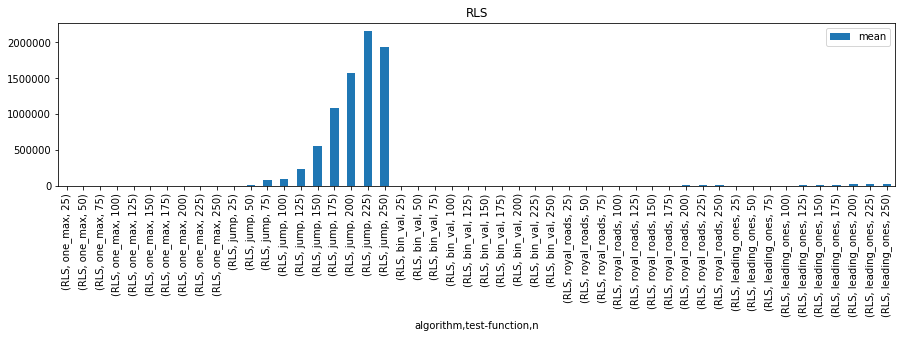

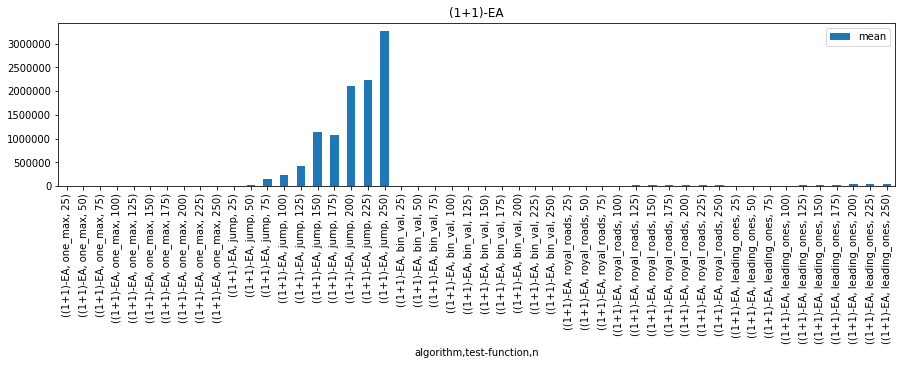

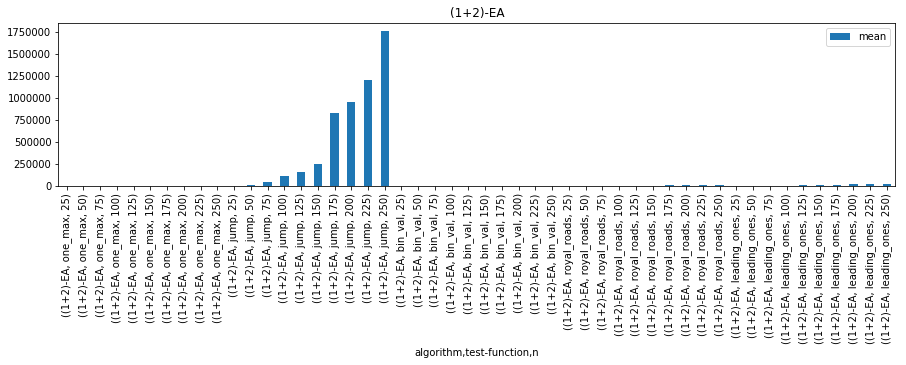

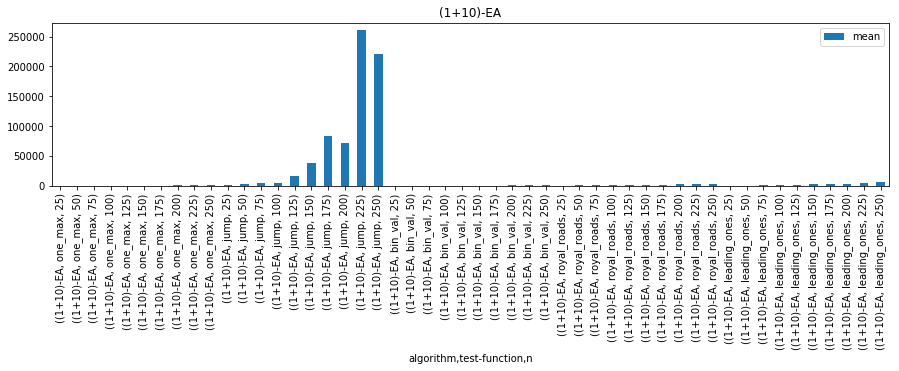

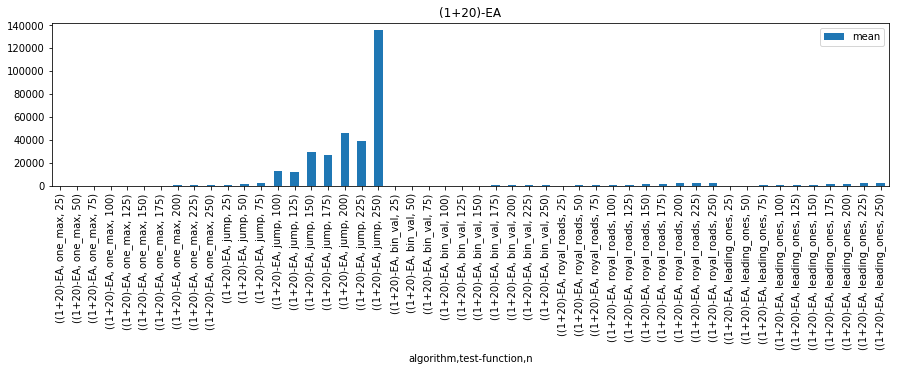

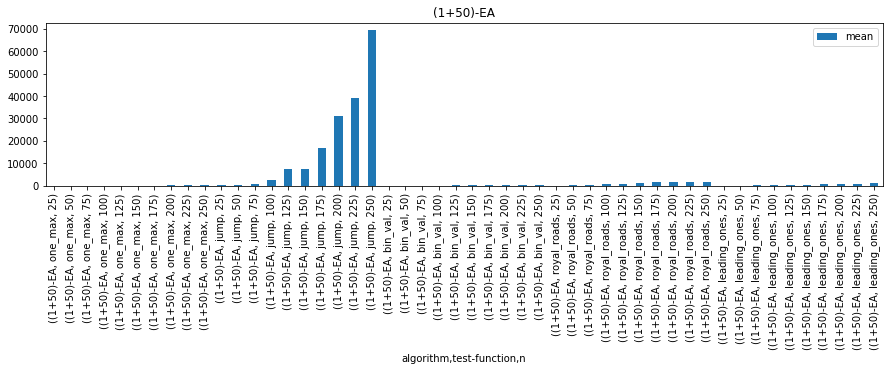

In [6]:
for algo_name in algos:
    df.set_index(['algorithm', 'test-function', 'n']).xs(level='algorithm', key=algo_name, drop_level=False)[['mean']].plot.bar(title=algo_name,figsize=(15,3))
    plt.show()

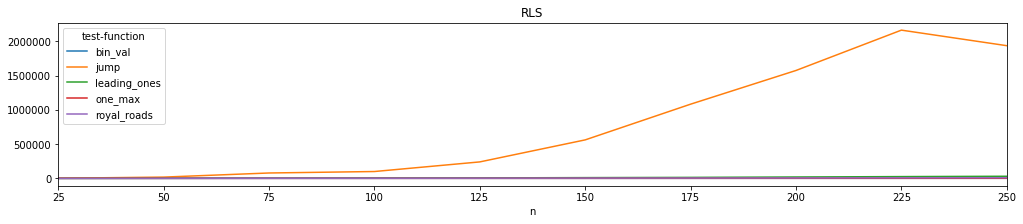

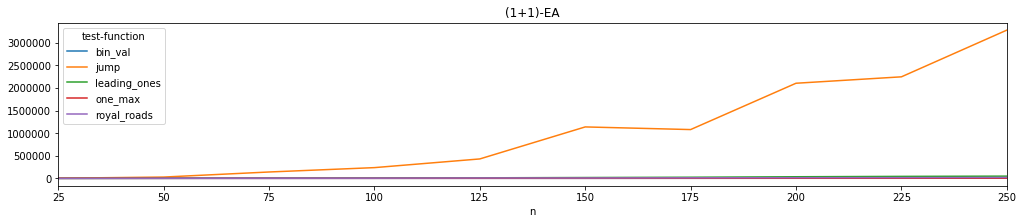

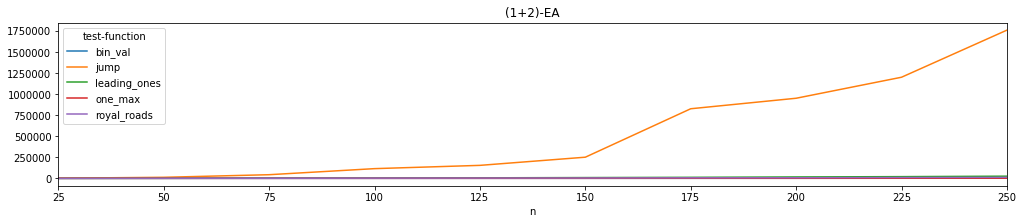

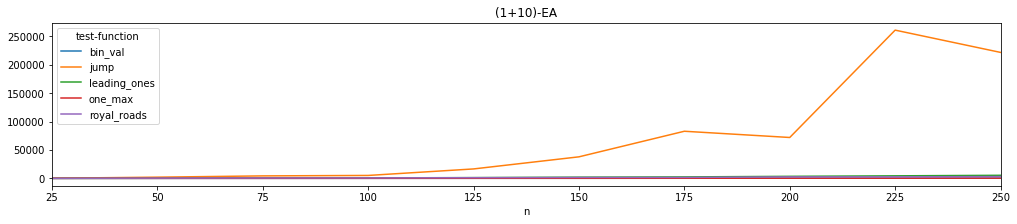

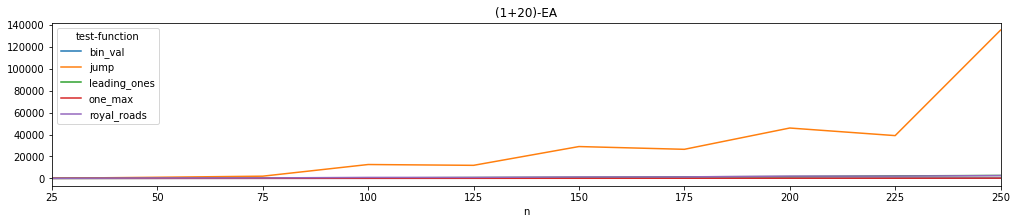

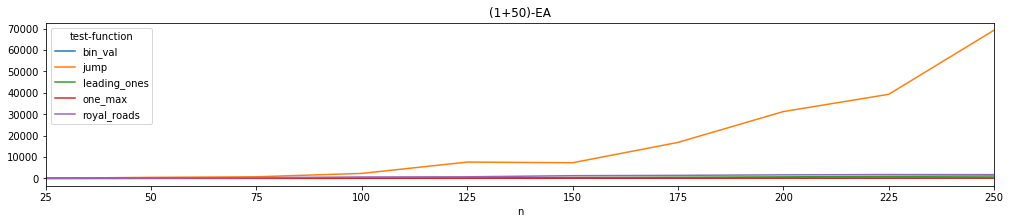

In [45]:
for algo_name in algos:
    df_algo = df[df['algorithm'] == algo_name]
    pivot = pd.pivot_table(df_algo,
                           values='mean',
                           index=['n'],
                           columns='test-function')
    pivot.plot(layout=(1,5), figsize=(17,3), title=algo_name)
    plt.show()

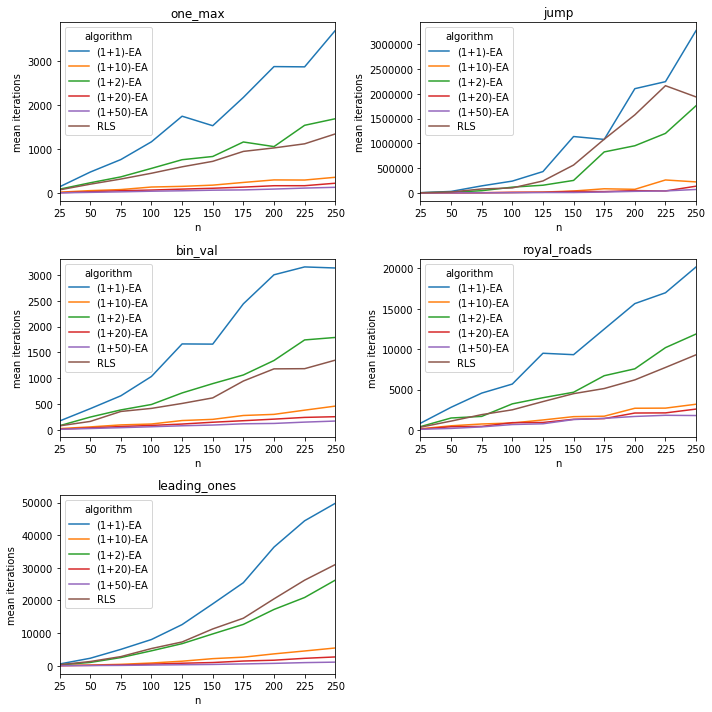

In [40]:
test_fn_names = [fn.__name__ for fn in [one_max, jump, bin_val, royal_roads, leading_ones]]
fig, axes = plt.subplots(3,2, figsize=(10,10))
for fn_name, ax in zip(test_fn_names, axes.flat):
    df_fn = df[df['test-function'] == fn_name]
    pivot = pd.pivot_table(df_fn,
                           values='mean',
                           index=['n'],
                           columns='algorithm')
    pivot.plot(ax=ax)
    ax.set_title(fn_name)
    ax.set_ylabel('mean iterations')
fig.delaxes(axes.flatten()[-1])
# fig.legend(axes.flat[0].lines, algos, loc=10,)#'lower right')
plt.tight_layout()
plt.savefig('iterations.png')
plt.show()


### print cost fns

In [5]:
from test_functions import one_max, jump, bin_val, royal_roads, leading_ones
from algos import generate_x
import itertools as it
import numpy as np

In [49]:
n = 10
strings = list(it.product([0,1],repeat=n))
strings.sort(key=lambda x: one_max(x))

In [50]:
# X = range(len(strings))
X = [one_max(s) for s in strings]

/Users/nico/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


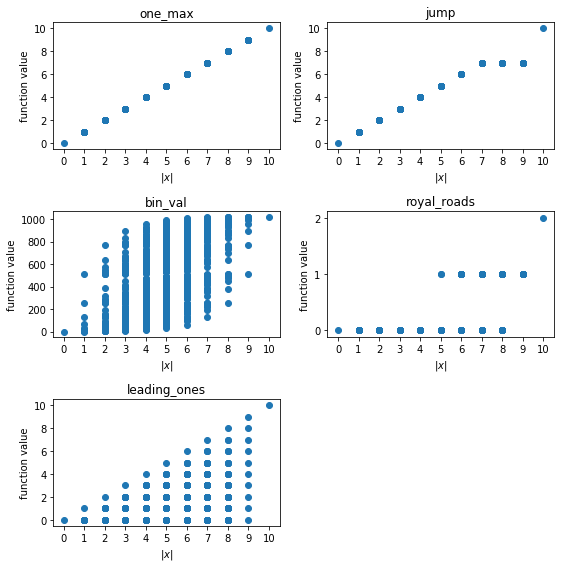

In [75]:
fig, axes = plt.subplots(3,2, figsize=(8,8))
for fn, ax in zip([one_max, jump, bin_val, royal_roads, leading_ones], axes.flat):
    Y = [fn(s) for s in strings]
    ax.scatter(X, Y)
    ax.set_title(fn.__name__)
    ax.set_xticks(range(0,11))
    ax.set_xlabel('$|x|$')
    ax.set_ylabel('function value')
    if fn.__name__ == royal_roads.__name__:
        ax.set_yticks([0,1,2])
#     plt.show()
#     plt.hist(Y)
fig.tight_layout()
fig.delaxes(axes.flat[-1])
fig.savefig('function_values.png')
fig.show()

In [3]:
s = [1] * 25
s[1] = 0
s[12] = 0
s[17] = 0
s

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [42]:
import random
from algos import stopping_criterion

def random_local_search(eval_fn, n, x):
    score = eval_fn(x)
    iterations = 0
    optimum = stopping_criterion(eval_fn, n)
#     print('optimum', optimum)
    ones = []
    while score != optimum:
        iterations += 1
        y = x.copy()
        i = random.randint(0, n - 1)
        y[i] = 1 - y[i]
        score_y = eval_fn(y)
        if score_y >= score:
            score = score_y
            x = y
        zeros = sum([1 for xi in x if xi ==0])
#         print(x, zeros)
        ones.append(sum(x))
    return iterations, ones


/Users/nico/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


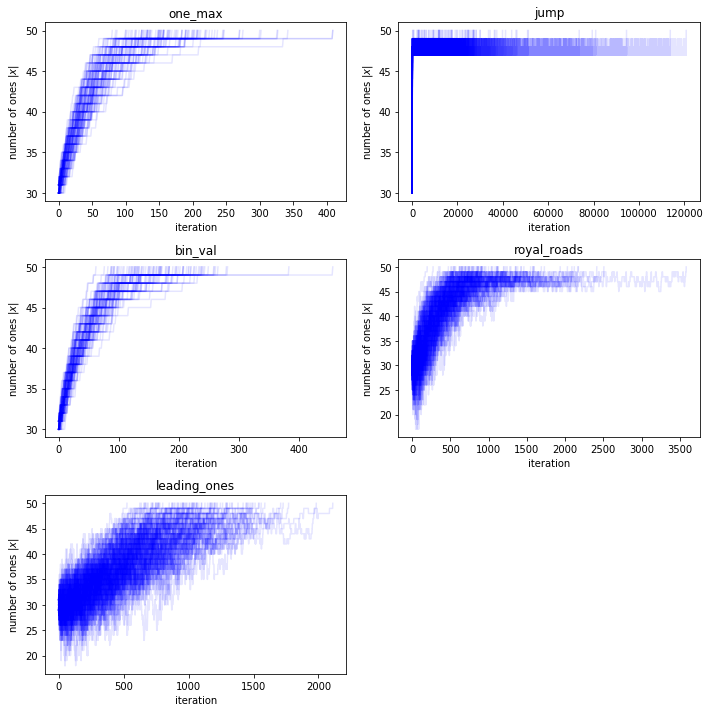

In [44]:
n = 50
ITER = 100
s = generate_x(n)
fig, axes = plt.subplots(3,2, figsize=(10,10))

for fn, ax in zip([one_max, jump, bin_val, royal_roads, leading_ones], axes.flat):
    for _ in range(ITER):
        _, ones = random_local_search(eval_fn=fn, n=n, x=s)
#         plt.scatter(range(len(ones)), ones)
        ax.plot(range(len(ones)), ones, alpha=0.1, color='b')
    ax.set_title(fn.__name__)
    ax.set_xlabel('iteration')
    ax.set_ylabel('number of ones $|x|$')
fig.delaxes(axes.flat[-1]) 
fig.tight_layout()
fig.savefig('number_of_ones.png')
fig.show()